In [ ]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.9/dist-packages/tensorflow-2.12.0.dist-info/*
    /usr/local/lib/python3.9/dist-packages/tensorflow/*
Proceed (Y/n)? y
y
y
y
y
  Successfully uninstalled tensorflow-2.12.0


In [ ]:
!pip install tensorflow==2.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.7/489.7 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 kB 51.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalling tensorflow-2.8.0:
      

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import models

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
image_size = 256
batch_size = 32
epochs = 50
channels=3

In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/pl/new'

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    shuffle=True,
    image_size=(image_size,image_size),
    batch_size= batch_size 
)

Found 7868 files belonging to 8 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Background_without_leaves',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy']

In [ ]:
len(dataset)

246

In [ ]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch[0].shape)
  print(label_batch.numpy())

(256, 256, 3)
[2 2 3 5 6 5 3 5 2 1 6 7 2 5 6 2 3 0 6 7 7 4 0 0 7 0 0 2 3 5 2 2]


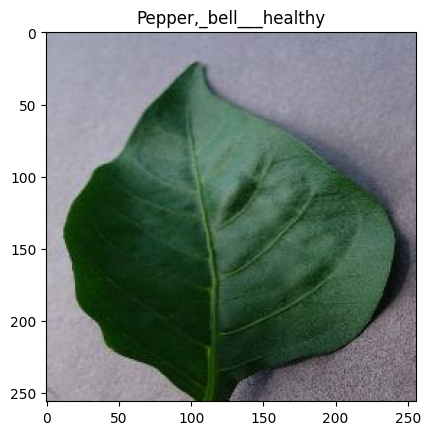

In [ ]:
for image_batch, label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype("uint8"))
  plt.title(class_names[label_batch[0]])
  # print(image_batch[0].numpy())

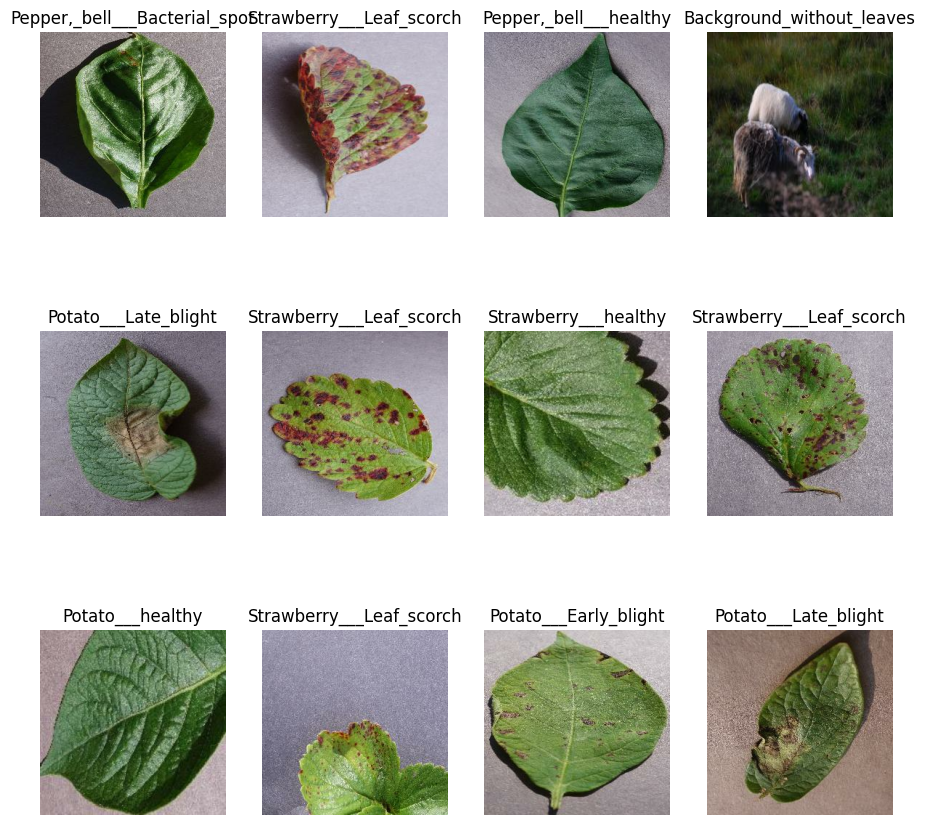

In [ ]:
plt.figure(figsize=(11,11))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [ ]:
train_ds = dataset.take(196)
len(train_ds)

196

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
  ds_size = len(ds)
  train_size = int(train_split*ds_size)
  val_size = int(val_split*ds_size)

  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12) 
  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)
  

  
  
  
  return train_ds, val_ds, test_ds



In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

196

In [ ]:
len(val_ds)

24

In [ ]:
len(test_ds)

26

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(image_size,image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255),
]
    
) 

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape = (batch_size, image_size, image_size, channels)
n_classes = 8
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.25),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_13 (Sequential)  (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_78 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_78 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_79 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_79 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs= epochs,
    batch_size = batch_size,
    verbose = 1,
    validation_data = val_ds 
)

Epoch 1/50
196/196 [==============================] - 12s 59ms/step - loss: 1.5865 - accuracy: 0.3780 - val_loss: 0.8586 - val_accuracy: 0.6341
Epoch 2/50
196/196 [==============================] - 11s 58ms/step - loss: 0.8457 - accuracy: 0.6621 - val_loss: 0.5133 - val_accuracy: 0.7930
Epoch 3/50
196/196 [==============================] - 11s 58ms/step - loss: 0.5097 - accuracy: 0.8120 - val_loss: 0.3352 - val_accuracy: 0.8880
Epoch 4/50
196/196 [==============================] - 11s 58ms/step - loss: 0.3396 - accuracy: 0.8780 - val_loss: 0.2335 - val_accuracy: 0.9167
Epoch 5/50
196/196 [==============================] - 11s 58ms/step - loss: 0.2949 - accuracy: 0.8924 - val_loss: 0.1921 - val_accuracy: 0.9297
Epoch 6/50
196/196 [==============================] - 11s 58ms/step - loss: 0.2244 - accuracy: 0.9179 - val_loss: 0.1688 - val_accuracy: 0.9414
Epoch 7/50
196/196 [==============================] - 11s 58ms/step - loss: 0.2290 - accuracy: 0.9198 - val_loss: 0.1241 - val_accuracy:

In [ ]:
scores = model.evaluate(test_ds)

26/26 [==============================] - 1s 23ms/step - loss: 0.0416 - accuracy: 0.9879


In [ ]:
scores

[0.04159730300307274, 0.987922728061676]

In [ ]:
history

In [ ]:
print(history.params)

{'verbose': 1, 'epochs': 50, 'steps': 196}


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history['accuracy']

[0.37802934646606445,
 0.6621492505073547,
 0.8120216727256775,
 0.8780293464660645,
 0.8923788070678711,
 0.9178890585899353,
 0.9198023080825806,
 0.9336734414100647,
 0.9320790767669678,
 0.946269154548645,
 0.952168345451355,
 0.9534438848495483,
 0.9507334232330322,
 0.9542410969734192,
 0.956632673740387,
 0.9598214030265808,
 0.9642857313156128,
 0.967793345451355,
 0.9703443646430969,
 0.9733737111091614,
 0.9787946343421936,
 0.9714604616165161,
 0.9786351919174194,
 0.9797512888908386,
 0.9634885191917419,
 0.9741709232330322,
 0.9757652878761292,
 0.9805484414100647,
 0.9757652878761292,
 0.9832589030265808,
 0.9757652878761292,
 0.9810267686843872,
 0.9821428656578064,
 0.9830994606018066,
 0.9703443646430969,
 0.9744898080825806,
 0.9893175959587097,
 0.9893175959587097,
 0.9835777878761292,
 0.9835777878761292,
 0.9830994606018066,
 0.9752869606018066,
 0.9877232313156128,
 0.9888392686843872,
 0.984375,
 0.9861288070678711,
 0.9867665767669678,
 0.9882015585899353,
 0.97

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

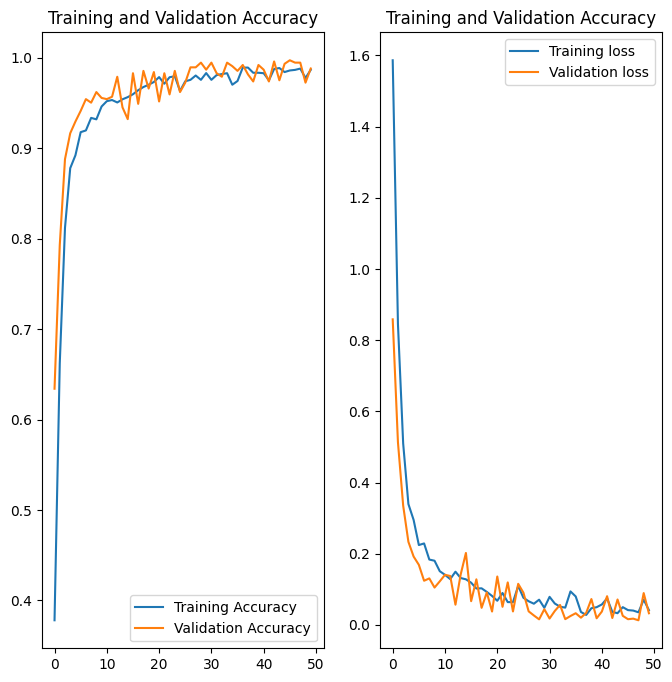

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(epochs), loss, label='Training loss')
plt.plot(range(epochs), val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

first image to predict
actual label Pepper,_bell___Bacterial_spot
predicted_label Pepper,_bell___Bacterial_spot


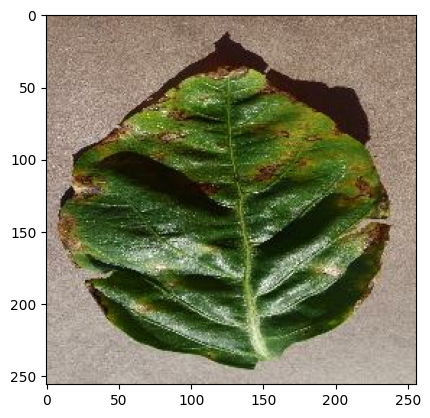

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()
  print("first image to predict")
  plt.imshow(first_image)
  print("actual label", class_names[first_label])
  batch_prediction = model.predict(images_batch)
  print("predicted_label",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

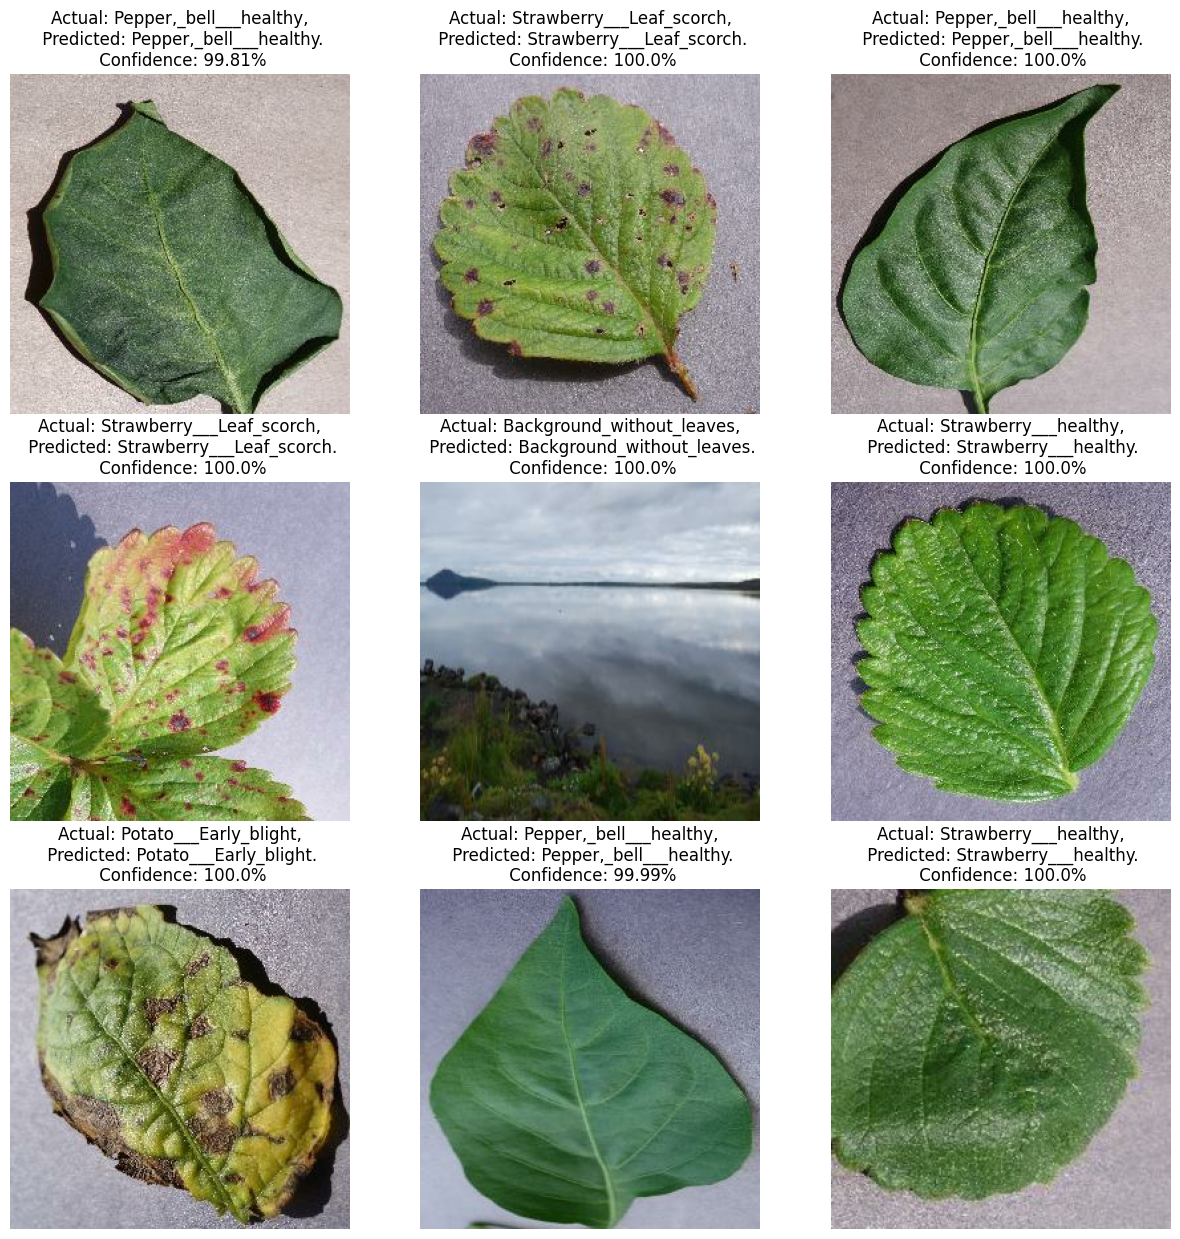

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
model.save("/content/drive/MyDrive/pl/model_8_Classes_2", save_format='h5')